In [30]:
## Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
import seaborn as sns
import matplotlib.dates as mdates 
from sklearn.metrics import mean_absolute_error, mean_squared_error 
from keras.callbacks import EarlyStopping
import tensorflow as tf

In [74]:
import numpy as np
import pandas as pd
# from torch.utils.data import DataLoader
# from torch.utils.data import TensorDataset
from tensorflow import keras
#import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# import torch
# from torch import nn
import math
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from pylab import mpl, plt
import time
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.layers import SpatialDropout1D
import tensorflow as tf

## Load data

In [54]:
data = pd.read_csv("./MSFT.csv")


In [32]:
data.shape

(5999, 7)

In [55]:
data["Date"]= pd.to_datetime(data["Date"])
data = data.set_index('Date')
data = data.sort_values(by = ['Date'])
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,58.68750,59.3125,56.00000,58.28125,36.205593,53228400
2000-01-04,56.78125,58.5625,56.12500,56.31250,34.982559,54119000
2000-01-05,55.56250,58.1875,54.68750,56.90625,35.351421,64059600
2000-01-06,56.09375,56.9375,54.18750,55.00000,34.167217,54976600
2000-01-07,54.31250,56.1250,53.65625,55.71875,34.613728,62013600


In [34]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5.999000e+03
mean,77.139668,77.949712,76.316865,77.156730,70.286945,5.137814e+07
std,86.048453,86.933727,85.126860,86.069734,87.619441,3.076160e+07
min,15.200000,15.620000,14.870000,15.150000,11.327565,7.425600e+06
25%,27.030001,27.295000,26.799999,27.045000,19.058252,2.875525e+07
50%,32.494999,32.937500,32.125000,32.590000,23.640200,4.612340e+07
75%,83.645001,84.184998,83.110001,83.840001,78.063667,6.507830e+07
max,361.750000,366.779999,352.440002,359.489990,358.730469,5.910522e+08


In [35]:
# check null
data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Data Visualization

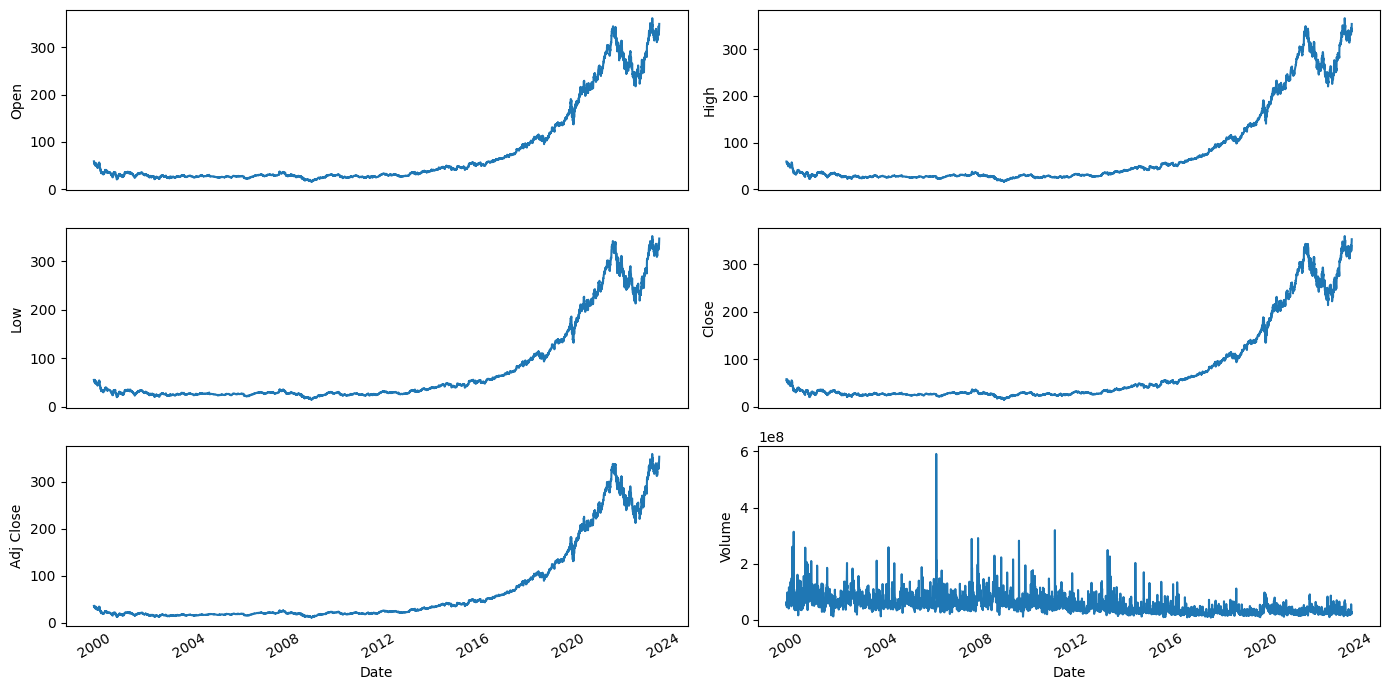

In [37]:
# Plot line charts
df_plot = data.copy()

ncols = 2
nrows = int(round(df_plot.shape[1] / ncols, 0))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(14, 7))
for i, ax in enumerate(fig.axes):
        sns.lineplot(data = df_plot.iloc[:, i], ax=ax)
        ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())
fig.tight_layout()
plt.show()

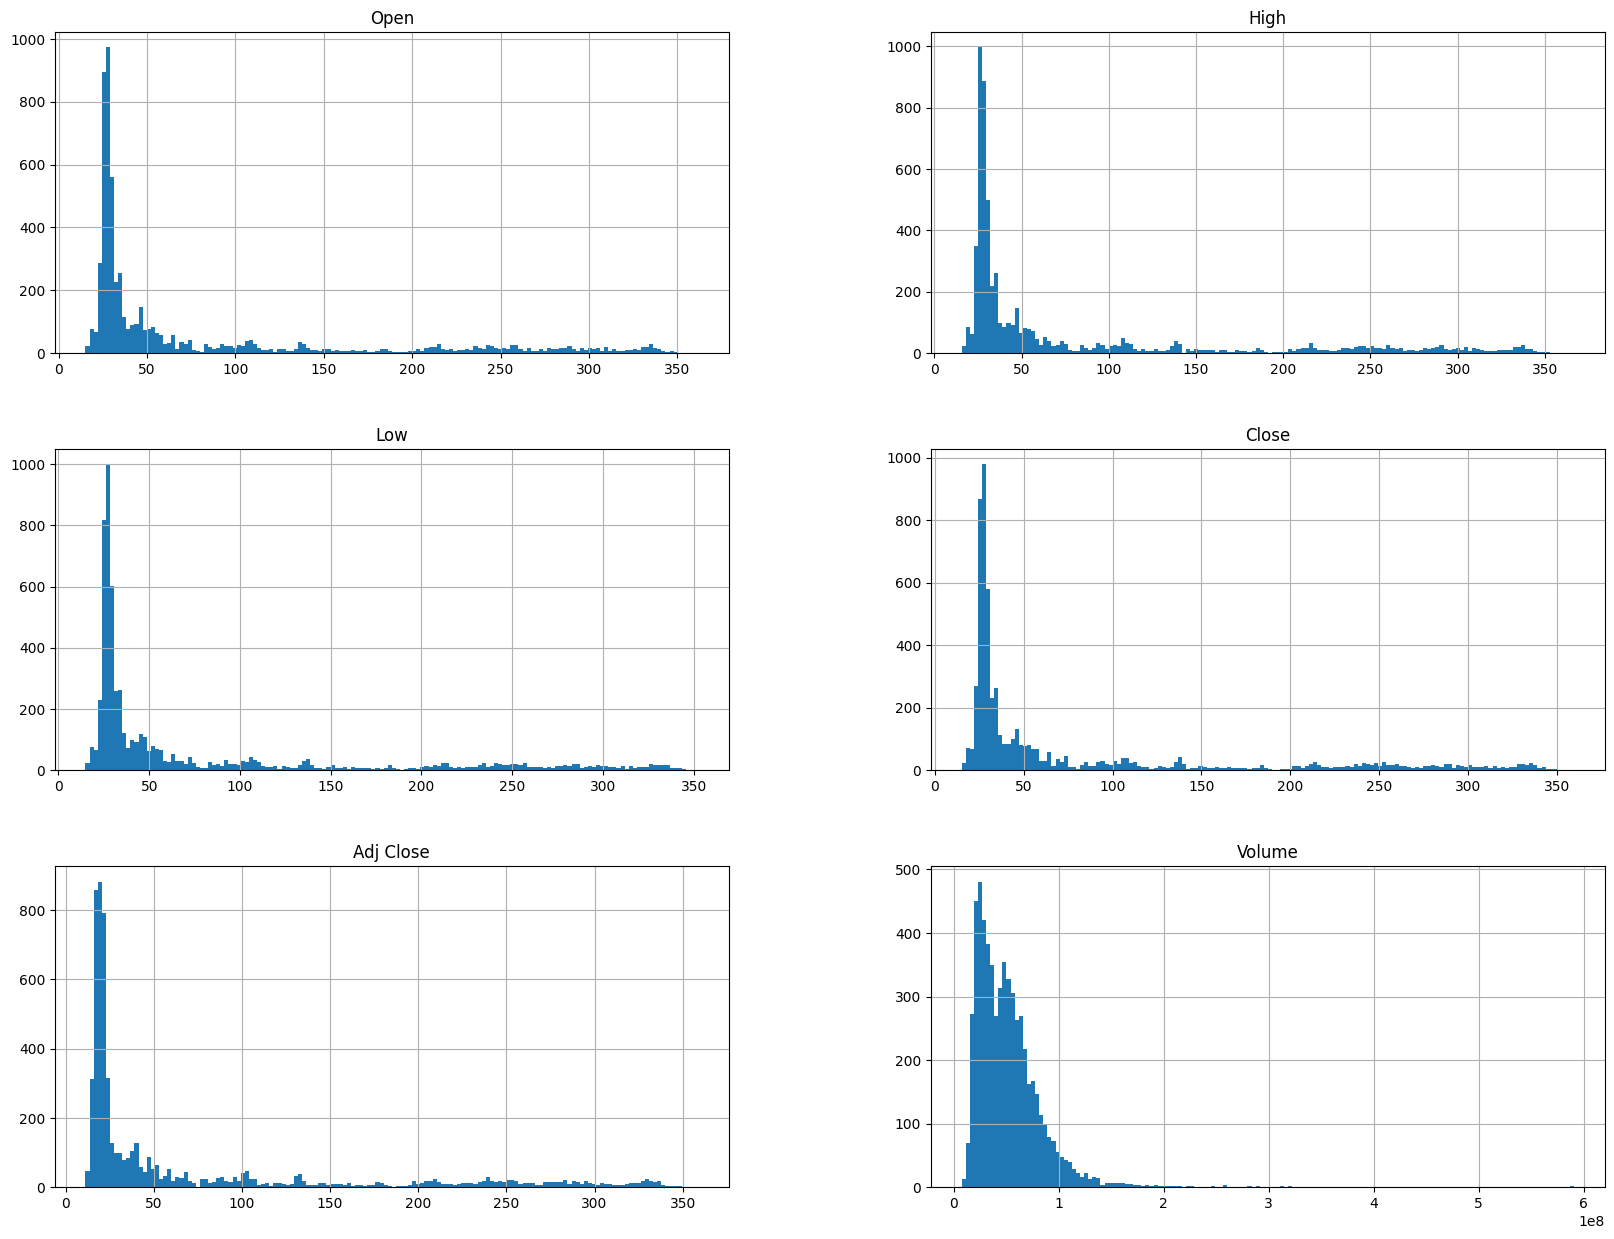

In [36]:
data.hist(bins = 150, figsize = (20,15))
plt.show()

In [61]:
# df = data.drop([ 'Adj Close'], axis = 1).copy()
df = data['Close']

In [63]:
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(np.array(df).reshape(-1,1))

In [65]:

training_size = round((df.shape[0]*0.1)*8)
validation_size = round((df.shape[0]*0.1)*9)
test_size = round((df.shape[0]))
print(training_size,validation_size-training_size,test_size-validation_size)

4799 600 600


In [68]:
data_training = df[:training_size, :]
data_validation = df[training_size:validation_size, :]
data_test =df[validation_size:test_size, :]

In [69]:
print(data_training.shape[0], data_validation.shape[0], data_test.shape[0])

4799 600 600


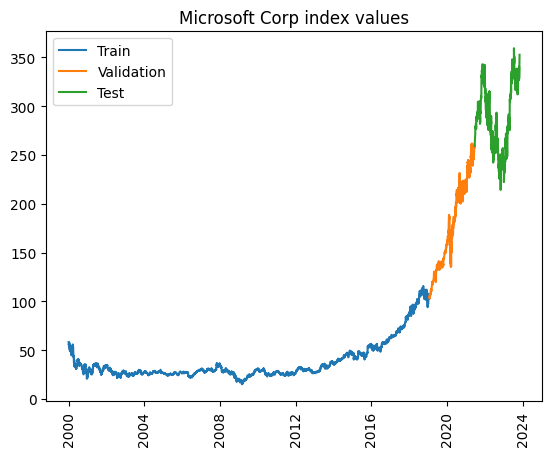

In [60]:
plt.plot(data_training.index, data_training.Close)
plt.plot(data_validation.index, data_validation.Close)
plt.plot(data_test.index, data_test.Close)
plt.title("Microsoft Corp index values")
plt.xticks(rotation=90)
plt.legend(['Train', 'Validation', 'Test'])

In [72]:
def create_data(data, time_step):

    sliding_data = []

    for index in range(len(data) - time_step):
        sliding_data.append(data[index: index + time_step])

    sliding_data = np.array(sliding_data)

    x_data = sliding_data.reshape(-1,time_step, 1)
    #y_data = sliding_data[:, -1].reshape(-1,1)
    y_data = data[time_step:].reshape(-1,1)

    return x_data, y_data

In [73]:
x_train, y_train = create_data(data_training, 20)
x_val, y_val = create_data(data_validation, 20)
x_test, y_test = create_data(data_test, 20)

In [79]:
# Function to print RMSE figures for models
def print_error(y_train, y_test, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(y_train, train_predict))
    test_rmse = math.sqrt(mean_squared_error(y_test, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    


In [80]:
# Function for Plotting Loss vs Epochs
def loss_epoch(history):
    plt.figure(figsize =(10,7))
    plt.plot(history.history["loss"])
    plt.xlabel("Epochs")
    plt.ylabel("Losses")
    plt.title("Simple RNN model, Loss vs Epoch")
    plt.show()

In [81]:
# Function for Plotting Accuracy vs Epochs
def MAE_epoch(history):
    plt.figure(figsize =(10,7))
    plt.plot(history.history["loss"])
    plt.xlabel("Epochs")
    plt.ylabel("Accuracies")
    plt.title("Simple RNN model, MAE vs Epoch")
    plt.show()

In [82]:
#  Function to Plot the result
def plot_result(y_train, y_test, train_predict, test_predict):
    actual = np.append(y_train, y_test)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(30, 10), dpi=80)
    plt.plot(range(rows), actual, c = "b")
    plt.plot(range(rows), predictions, c = "r")
    plt.axvline(x=len(y_train), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Open Values scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')


In [76]:
def vanilla_RNN (hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(units = hidden_units, input_shape = input_shape, activation = activation[0]))
    model.add(Dense(units = dense_units, activation = activation[1]))
    model.compile(loss = "mean_squared_error", optimizer = "adam", metrics=tf.keras.metrics.MeanAbsoluteError())
    return model

In [77]:
model = vanilla_RNN(hidden_units=1, dense_units=1, input_shape=(20,1), 
                   activation=['tanh', 'tanh'])
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=10, batch_size=20, verbose=2)

Epoch 1/10
239/239 - 6s - loss: 0.0630 - mean_absolute_error: 0.1735 - val_loss: 1.9118 - val_mean_absolute_error: 1.3768 - 6s/epoch - 24ms/step
Epoch 2/10
239/239 - 2s - loss: 0.0153 - mean_absolute_error: 0.0872 - val_loss: 1.2696 - val_mean_absolute_error: 1.1187 - 2s/epoch - 8ms/step
Epoch 3/10
239/239 - 2s - loss: 0.0062 - mean_absolute_error: 0.0567 - val_loss: 0.6350 - val_mean_absolute_error: 0.7897 - 2s/epoch - 10ms/step
Epoch 4/10
239/239 - 2s - loss: 0.0027 - mean_absolute_error: 0.0370 - val_loss: 0.2739 - val_mean_absolute_error: 0.5178 - 2s/epoch - 8ms/step
Epoch 5/10
239/239 - 2s - loss: 9.6849e-04 - mean_absolute_error: 0.0219 - val_loss: 0.1427 - val_mean_absolute_error: 0.3715 - 2s/epoch - 9ms/step
Epoch 6/10
239/239 - 2s - loss: 2.5486e-04 - mean_absolute_error: 0.0108 - val_loss: 0.0961 - val_mean_absolute_error: 0.3023 - 2s/epoch - 9ms/step
Epoch 7/10
239/239 - 2s - loss: 5.1992e-05 - mean_absolute_error: 0.0045 - val_loss: 0.0796 - val_mean_absolute_error: 0.2735 

In [83]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)
# Mean square error
print_error(y_train, y_test, train_predict, test_predict)

 15/150 [==>...........................] - ETA: 1s

19/19 [==============================] - 0s 12ms/step
Train RMSE: 0.004 RMSE
Test RMSE: 0.269 RMSE


In [109]:
train_predict

array([[0.10727375],
       [0.10740297],
       [0.10697519],
       ...,
       [0.25850758],
       [0.25820282],
       [0.25693268]], dtype=float32)

In [103]:
train_predict

array([[0.10727375],
       [0.10740297],
       [0.10697519],
       ...,
       [0.25850758],
       [0.25820282],
       [0.25693268]], dtype=float32)

In [106]:
data.index[:training_size].reshape(4779, 1)

AttributeError: 'DatetimeIndex' object has no attribute 'reshape'

In [111]:
lst = [[i] for i in data.index[:training_size].to_numpy()]

In [112]:
lst

[[numpy.datetime64('2000-01-03T00:00:00.000000000')],
 [numpy.datetime64('2000-01-04T00:00:00.000000000')],
 [numpy.datetime64('2000-01-05T00:00:00.000000000')],
 [numpy.datetime64('2000-01-06T00:00:00.000000000')],
 [numpy.datetime64('2000-01-07T00:00:00.000000000')],
 [numpy.datetime64('2000-01-10T00:00:00.000000000')],
 [numpy.datetime64('2000-01-11T00:00:00.000000000')],
 [numpy.datetime64('2000-01-12T00:00:00.000000000')],
 [numpy.datetime64('2000-01-13T00:00:00.000000000')],
 [numpy.datetime64('2000-01-14T00:00:00.000000000')],
 [numpy.datetime64('2000-01-18T00:00:00.000000000')],
 [numpy.datetime64('2000-01-19T00:00:00.000000000')],
 [numpy.datetime64('2000-01-20T00:00:00.000000000')],
 [numpy.datetime64('2000-01-21T00:00:00.000000000')],
 [numpy.datetime64('2000-01-24T00:00:00.000000000')],
 [numpy.datetime64('2000-01-25T00:00:00.000000000')],
 [numpy.datetime64('2000-01-26T00:00:00.000000000')],
 [numpy.datetime64('2000-01-27T00:00:00.000000000')],
 [numpy.datetime64('2000-01-

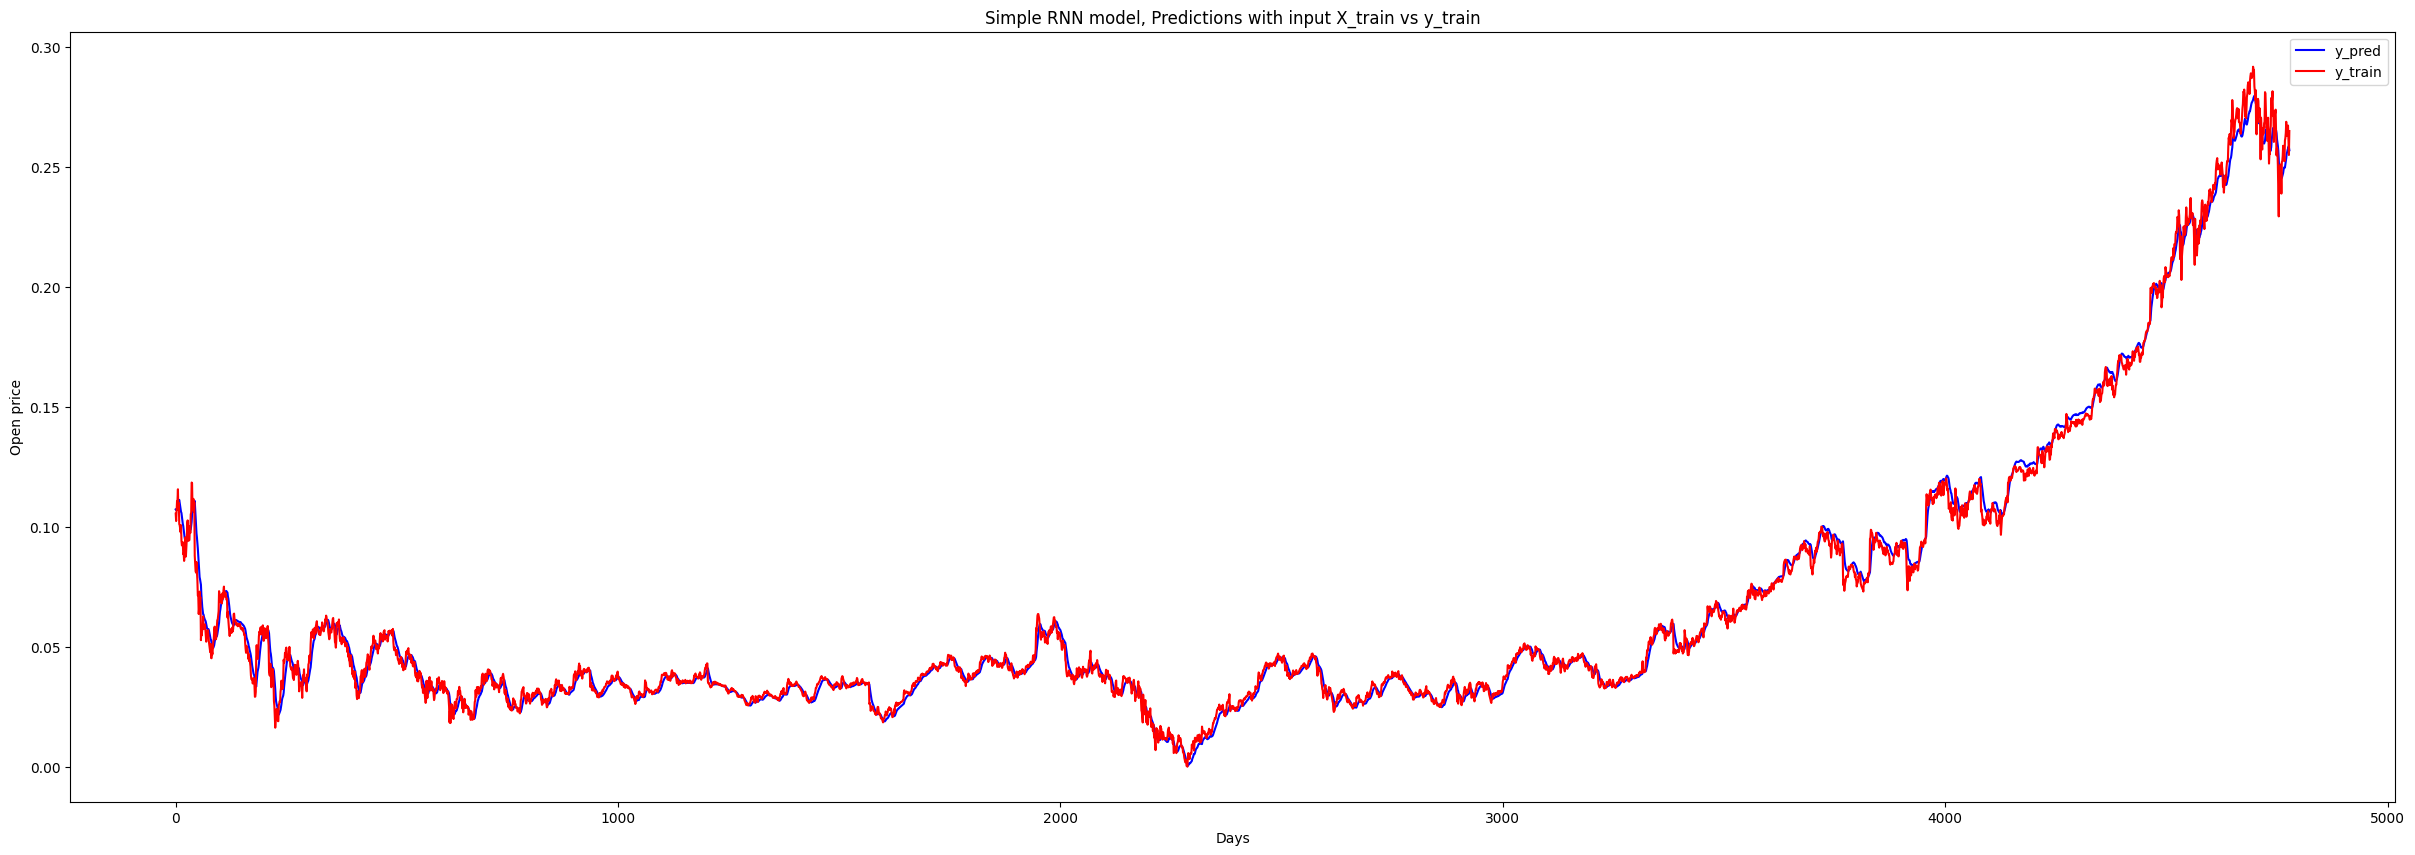

In [115]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(train_predict, color = "b", label = "y_pred" )
plt.plot(y_train, color = "r", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()